# 最短路径

## 读取数据

In [1]:
import pandas as pd
import os
def load_data(path):
    df = pd.read_excel(path, index_col='交易时间')
    df.dropna(inplace=True)
    return df

In [2]:
import numpy as np
path = '../附录_数据/'
list_df = pd.read_excel(os.path.join(path, '指数数据表.xlsx'), dtype={'指数编码':np.str_}, index_col='指数编码')
list_df.index = list_df.index.astype(np.str_)

In [3]:
list_dict = list_df['指数名称'].to_dict()
list_dict

{'000001': '上证指数',
 'HSI': '恒生指数',
 'KS11': '韩国综合指数',
 'STI': '富时新加坡海峡时报',
 'N225': '日经225',
 'SENSEX': '孟买Sensex30',
 'AS51': '澳大利亚标普200指数',
 'RTS': '俄罗斯RTS',
 'FCHI': '法国CAC40',
 'GDAXI': '德国DAX',
 'IBEX': '西班牙IBEX35',
 'MIB': '富时意大利MIB',
 'AEX': '荷兰AEX',
 'FTSE': '英国富时100',
 'SPX': '标普500',
 'MXX': '墨西哥MXX',
 'BFX': '比利时BFX',
 'ATX': '奥地利ATX',
 'SSMI': '瑞士SMI',
 'DJIA': '道琼斯工业平均',
 'IXIC': '纳斯达克',
 '399001': '深证成指',
 '000300': '沪深300',
 'TWII': '台湾加权'}

In [4]:
ret_origin_df=pd.DataFrame()
path = '../附录_数据/指数日线数据/'
for i in os.listdir(path):
    code = i.split('.xls')[0].split('K线导出_')[-1].split('_日线数据')[0]
    ret_origin_df[list_dict[code]] = load_data(os.path.join(path, i))['收盘价']

In [5]:
ret_origin_df.head()

,俄罗斯RTS,奥地利ATX,道琼斯工业平均,标普500,台湾加权,恒生指数,深证成指,沪深300,富时新加坡海峡时报,韩国综合指数,...,西班牙IBEX35,英国富时100,比利时BFX,上证指数,澳大利亚标普200指数,纳斯达克,墨西哥MXX,孟买Sensex30,日经225,瑞士SMI
交易时间,,,,,,,,,,,,,,,,,,,,,
2000-01-05,173.00,1192.89,11122.65,1402.11,8849.87,15846.71,3486.285,NaN,2425.90,986.31,...,10863.1,6535.9,3057.53,1409.68,3018.7,3877.54,6764.31,5357.00,18542.55,7181.3
2000-01-06,186.26,NaN,11253.26,1403.45,8922.03,15153.23,3655.200,NaN,2409.00,960.79,...,NaN,6447.2,3061.09,1463.94,2999.3,3727.13,6751.65,5421.53,18168.27,7280.6
2000-01-10,200.81,1236.09,11572.20,1457.60,9102.60,15848.15,3921.483,NaN,2457.59,987.24,...,11173.3,6607.7,3203.75,1545.11,3084.0,4049.67,7333.70,5518.39,NaN,7452.8
2000-01-11,199.57,1225.68,11511.08,1438.56,8927.03,15862.09,3716.784,NaN,2449.74,981.33,...,11012.4,6518.9,3148.90,1479.78,3160.8,3921.19,7143.13,5296.30,18850.92,7420.1
2000-01-12,196.88,1206.27,11551.10,1432.25,9144.65,15714.20,3605.824,NaN,2452.61,955.01,...,10851.8,6532.8,3110.25,1438.02,3088.4,3850.02,7174.10,5491.20,18677.42,7440.2


## 清洗数据

In [6]:
ret_cleaned_df = ret_origin_df.fillna(method="ffill").dropna()

In [7]:
ret_cleaned_df.head()

,俄罗斯RTS,奥地利ATX,道琼斯工业平均,标普500,台湾加权,恒生指数,深证成指,沪深300,富时新加坡海峡时报,韩国综合指数,...,西班牙IBEX35,英国富时100,比利时BFX,上证指数,澳大利亚标普200指数,纳斯达克,墨西哥MXX,孟买Sensex30,日经225,瑞士SMI
交易时间,,,,,,,,,,,,,,,,,,,,,
2005-01-05,552.22,2446.96,10597.83,1183.74,5988.37,13764.36,3052.860,992.56,1998.51,885.19,...,9024.4,4806.0,2971.79,1251.94,4039.4,2091.24,12591.33,6458.84,11437.52,5725.5
2005-01-08,552.22,2446.96,10597.83,1183.74,5988.37,13764.36,3052.860,992.56,1998.51,885.19,...,9024.4,4806.0,2971.79,1251.94,4039.4,2091.24,12591.33,6458.84,11437.52,5725.5
2005-01-11,547.85,2435.34,10556.22,1182.99,5975.66,13509.25,3069.570,997.14,2008.43,884.29,...,8966.4,4818.7,2980.23,1257.46,4072.7,2079.62,12216.80,6222.87,11539.99,5713.1
2005-01-12,545.31,2421.63,10617.78,1187.70,5879.08,13565.31,3064.344,996.75,1995.15,880.03,...,8945.7,4783.6,2973.92,1256.92,4070.4,2092.53,12329.16,6102.74,11453.39,5669.6
2005-01-13,543.90,2415.01,10505.83,1177.45,5853.94,13573.28,3074.365,996.88,1998.98,885.54,...,9016.8,4800.3,2959.72,1256.31,4069.5,2070.56,12462.90,6221.06,11358.22,5687.8


## 求对数收益率

In [8]:
ret_log_df = (ret_cleaned_df/ret_cleaned_df.shift(1)).apply(np.log)
ret_log_df = ret_log_df.dropna()
ret_log_df.head()

,俄罗斯RTS,奥地利ATX,道琼斯工业平均,标普500,台湾加权,恒生指数,深证成指,沪深300,富时新加坡海峡时报,韩国综合指数,...,西班牙IBEX35,英国富时100,比利时BFX,上证指数,澳大利亚标普200指数,纳斯达克,墨西哥MXX,孟买Sensex30,日经225,瑞士SMI
交易时间,,,,,,,,,,,,,,,,,,,,,
2005-01-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-01-11,-0.007945,-0.004760,-0.003934,-0.000634,-0.002125,-0.018708,0.005459,0.004604,0.004951,-0.001017,...,-0.006448,0.002639,0.002836,0.004399,0.008210,-0.005572,-0.030196,-0.037219,0.008919,-0.002168
2005-01-12,-0.004647,-0.005646,0.005815,0.003974,-0.016294,0.004141,-0.001704,-0.000391,-0.006634,-0.004829,...,-0.002311,-0.007311,-0.002120,-0.000430,-0.000565,0.006189,0.009155,-0.019493,-0.007533,-0.007643
2005-01-13,-0.002589,-0.002737,-0.010600,-0.008668,-0.004285,0.000587,0.003265,0.000130,0.001918,0.006242,...,0.007917,0.003485,-0.004786,-0.000485,-0.000221,-0.010555,0.010789,0.019202,-0.008344,0.003205
2005-01-14,0.008768,0.003856,0.004954,0.005987,0.006060,-0.005800,-0.006149,-0.008634,-0.000681,0.021848,...,0.000920,0.004261,-0.000314,-0.008545,-0.001943,0.008344,0.018432,-0.007623,0.007034,0.007409


<AxesSubplot:xlabel='交易时间'>

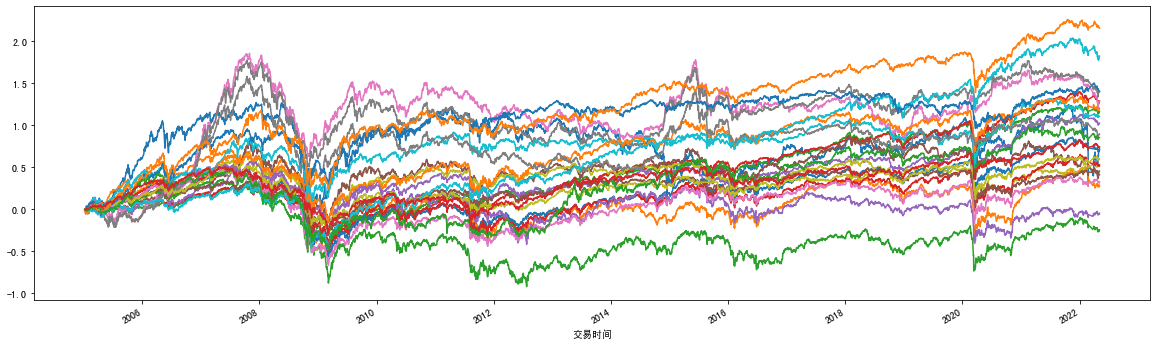

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示异常
ret_log_df.cumsum().plot(figsize=(20, 6), legend=False)

## 相关系数矩阵

### 全局相关系数

<AxesSubplot:>

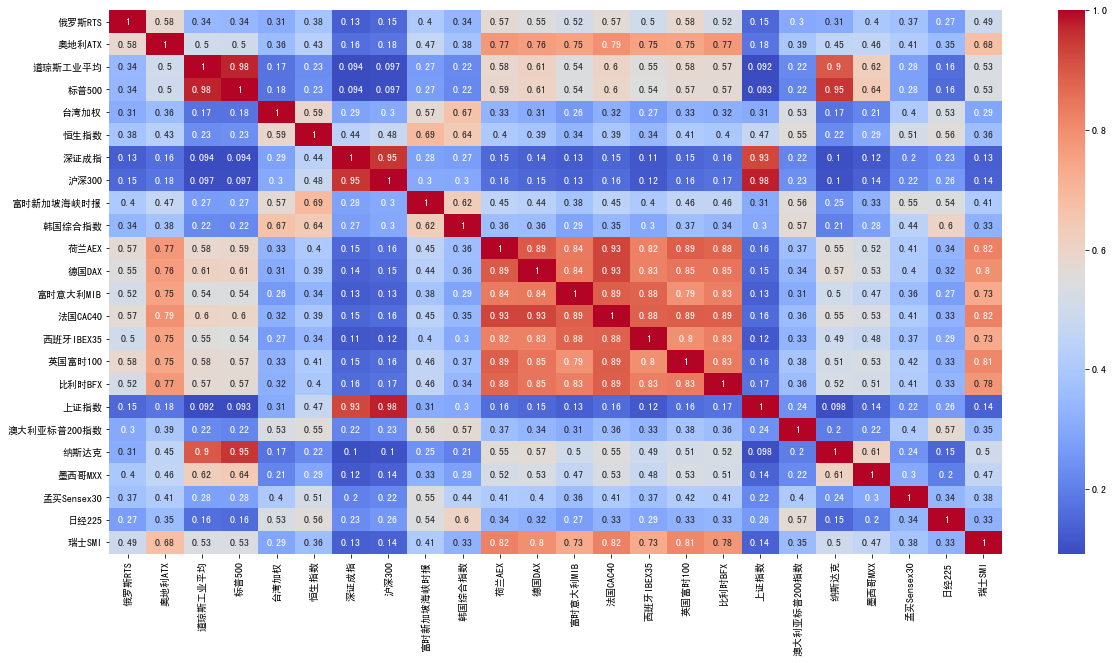

In [21]:
# correlation using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(ret_log_df.corr(), annot = True, cmap='coolwarm')

<Figure size 432x288 with 0 Axes>

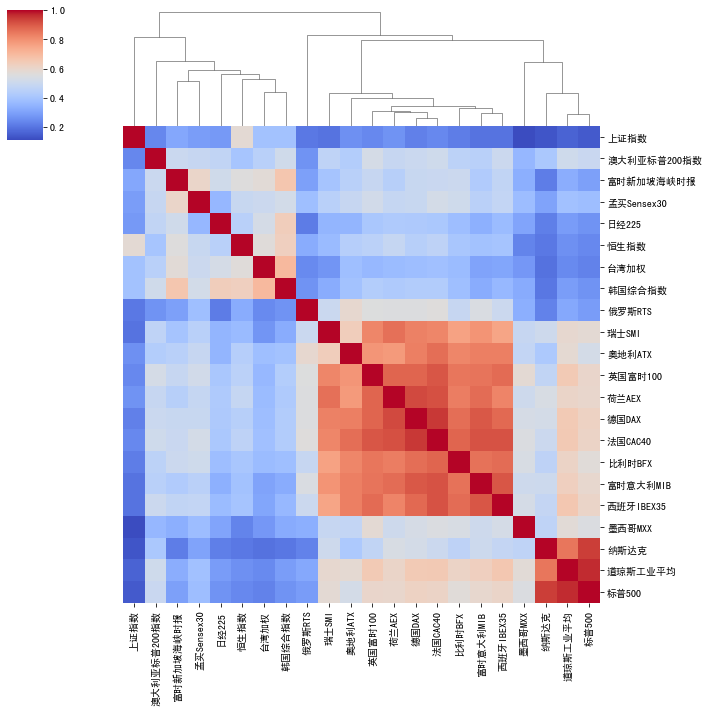

In [123]:
plt.figure()
g = sns.clustermap(ret_log_df[['俄罗斯RTS', '奥地利ATX', '道琼斯工业平均', '标普500', '台湾加权', '恒生指数',
       '富时新加坡海峡时报', '韩国综合指数', '荷兰AEX', '德国DAX', '富时意大利MIB', '法国CAC40',
       '西班牙IBEX35', '英国富时100', '比利时BFX', '上证指数', '澳大利亚标普200指数', '纳斯达克',
       '墨西哥MXX', '孟买Sensex30', '日经225', '瑞士SMI']].iloc[-600:].corr(), cmap='coolwarm')
g.ax_row_dendrogram.remove()
g.savefig('heat_map.jpg')

### rolling相关系数

In [31]:
from tqdm import tqdm
def cal_rolling_corr(ret_df, min_periods):
    """
    df: pd.DataFrame, 行标题日期
    """
    _corr_ret_list = []
    _corr_ret_df = pd.DataFrame()
    for i in tqdm(range(ret_df.shape[0])):
        if i<min_periods: 
            _corr_ret_list.append(np.nan)
            _corr_ret_df[ret_df.index[i]] = np.nan * ret_df.iloc[i]
        else:
            _ret_rolling_df = ret_df.iloc[i-min_periods:i, :]
            _corr = (_ret_rolling_df.corr().sum()-1)/_ret_rolling_df.shape[1]
            _corr_ret_list.append(_corr.mean())
            _corr_ret_df[ret_df.index[i]]=_corr
    rolling_corr_ts = pd.Series(_corr_ret_list, index=ret_df.index)
    rolling_corr_df = _corr_ret_df.T
    return rolling_corr_ts, rolling_corr_df

In [98]:
rolling_corr_ts, rolling_corr_df= cal_rolling_corr(ret_log_df[['俄罗斯RTS', '奥地利ATX', '道琼斯工业平均', '标普500', '台湾加权', '恒生指数', 
       '富时新加坡海峡时报', '韩国综合指数', '荷兰AEX', '德国DAX', '富时意大利MIB', '法国CAC40',
       '西班牙IBEX35', '英国富时100', '比利时BFX',  '澳大利亚标普200指数', '纳斯达克',
       '墨西哥MXX', '孟买Sensex30', '日经225', '瑞士SMI']], min_periods=300)
# rolling_corr_ts, rolling_corr_df= cal_rolling_corr(ret_log_df, min_periods=60)

  0%|          | 0/4313 [00:00<?, ?it/s]

/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_59829/1968767220.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  _corr_ret_df[ret_df.index[i]] = np.nan * ret_df.iloc[i]
/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_59829/1968767220.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  _corr_ret_df[ret_df.index[i]]=_corr


<AxesSubplot:xlabel='交易时间'>

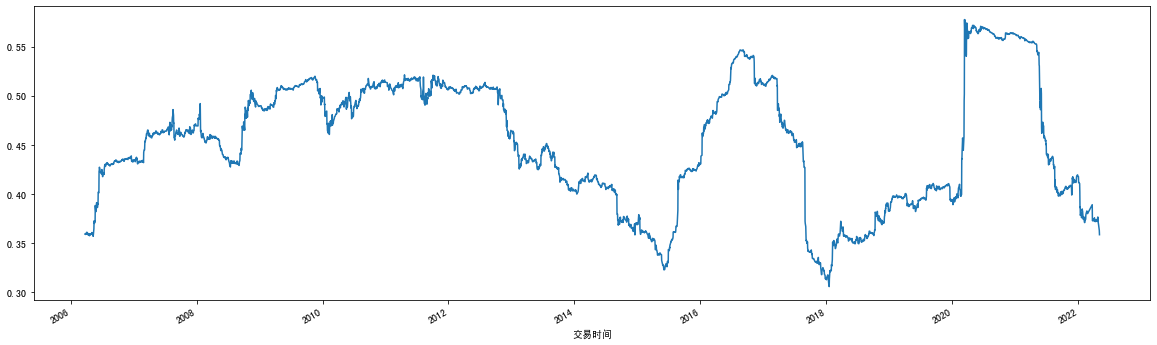

In [99]:
rolling_corr_ts.plot(figsize=(20,6), legend=False)

<AxesSubplot:xlabel='交易时间'>

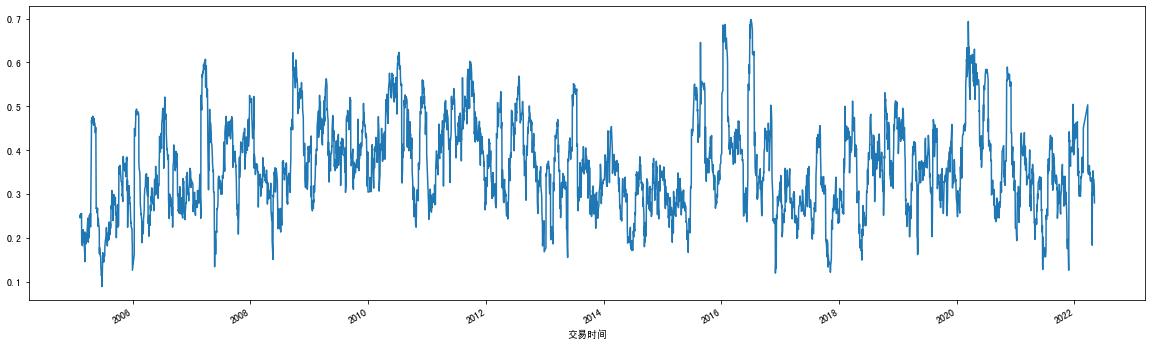

In [86]:
rolling_corr_ts.plot(figsize=(20,6), legend=False)

## 最短路径

$$
l = \frac{1}{N(N-1)}\sum_{i\neq j}\tau_{ij}
$$

### 全局最短路径

由相关系数矩阵计算距离d，设置阈值$\epsilon$，来过滤掉部分相关系数低的节点相关系数。然后计算结点距离$d_{ij}$，得到邻接矩阵A

In [52]:
tmp = ret_log_df.corr()
corr_threshold_val = 0.4
tmp[tmp<corr_threshold_val]=np.nan
adjacent_matrix_df = (2*(1-tmp)).apply(np.sqrt)
#D.head()
#D.to_csv('adjacent_df.csv')

调用dijkstra算法计算节点间的最短路径，生成最短路径矩阵dijkstra_matrix

In [17]:
# from dijkstra_algo import Graph
# DG = Graph(G_matrix=D)
# dijkstra_matrix = DG.get_dijkstra_matrix() 

In [54]:
from networkx_dijkstra_algo import networkx_dijkstra
dijkstra_matrix_df = networkx_dijkstra(adjacent_matrix_df)

In [19]:
tau = np.nansum(dijkstra_matrix)/len(dijkstra_matrix)/(len(dijkstra_matrix)-1)
tau

1.5864761285784652

### rolling最短路径

In [103]:
from networkx_dijkstra_algo import networkx_dijkstra
def cal_dijkstra_matrix(ret_log_df, corr_threshold_val=0.1):
    tmp = ret_log_df.corr().abs()
    tmp[tmp<corr_threshold_val]=np.nan
    D = (2*(1-tmp)).apply(np.sqrt)
    dijkstra_matrix = networkx_dijkstra(D)
    return dijkstra_matrix

In [104]:
from tqdm.notebook import tqdm
def cal_rolling_tao(ret_log_df, min_periods):
    """
    df: pd.DataFrame, 行标题日期
    """
    tao_timeseries = []
    for i in tqdm(range(ret_log_df.shape[0])):
        if i<min_periods: 
            tao_timeseries.append(np.nan)
        else:
            rolling_ret = ret_log_df.iloc[i-min_periods:i, :]
            dijkstra_matrix = cal_dijkstra_matrix(rolling_ret)
            tao_timeseries.append(np.nansum(dijkstra_matrix)/len(dijkstra_matrix)/(len(dijkstra_matrix)-1))
    return pd.DataFrame(tao_timeseries, index=ret_log_df.index)

In [105]:
tao = cal_rolling_tao(ret_log_df, min_periods=60)

  0%|          | 0/4313 [00:00<?, ?it/s]

In [124]:
tao

,0
交易时间,
2005-01-08,NaN
2005-01-11,NaN
2005-01-12,NaN
2005-01-13,NaN
2005-01-14,NaN
...,...
2022-04-27,1.140563
2022-04-28,1.137774
2022-04-29,1.138154


<AxesSubplot:xlabel='交易时间'>

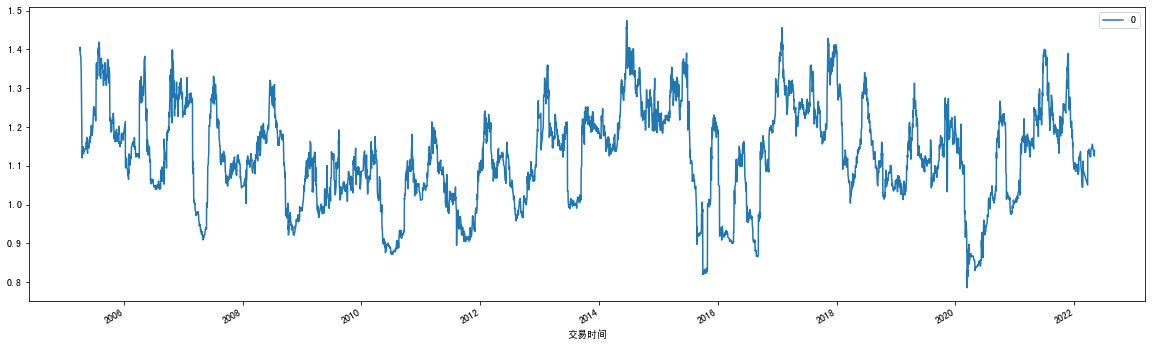

In [125]:
tao.plot(figsize=(20,6))

## rolling w

In [40]:
from tqdm.notebook import tqdm
def cal_distance(ret_log_df, corr_threshold_val=0.3):
    tmp = ret_log_df.corr().abs()
    tmp[tmp<corr_threshold_val]=np.nan
    D = (2*(1-tmp)).apply(np.sqrt)
    return D

def cal_w(ret, min_periods=200):
    """
    df: pd.DataFrame, 行标题日期
    """
    w_timeseries = []
    for i in tqdm(range(ret.shape[0])):
        if i<min_periods: 
            w_timeseries.append(np.nan)
        else:
            rolling_ret = ret.iloc[i-min_periods:i, :]
            D = cal_distance(rolling_ret)
            w=(-D).apply(np.exp)
            w=(np.nansum(w)-1)*2/(len(w)*(len(w)-1))
            w_timeseries.append(w)
    return pd.DataFrame(w_timeseries, index=ret.index)

In [41]:
w = cal_w(ret)

  0%|          | 0/4313 [00:00<?, ?it/s]

<AxesSubplot:xlabel='交易时间'>

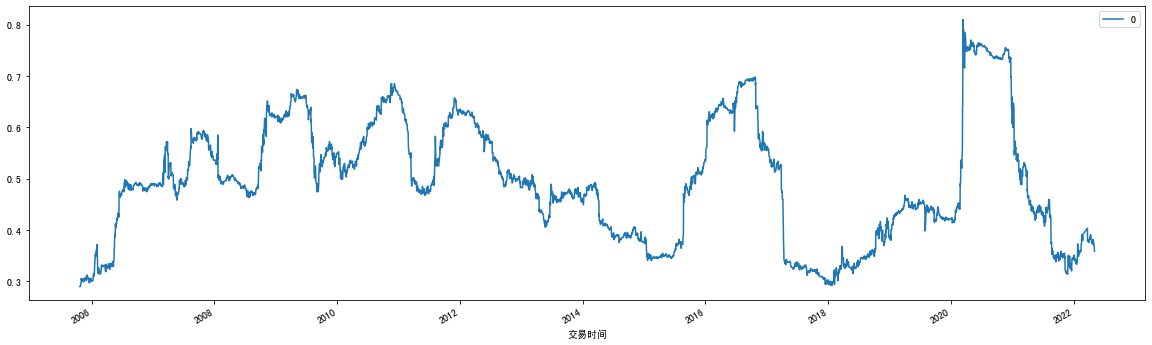

In [42]:
w.plot(figsize=(20,6))

## 熵值

In [78]:
from tqdm.notebook import tqdm
def cal_distance(ret_log_df, corr_threshold_val=0.):
    tmp = ret_log_df.corr().abs()
    tmp[tmp<corr_threshold_val]=np.nan
    D = (2*(1-tmp)).apply(np.sqrt)
    return D

def cal_entropy(ret_log_df, min_periods):
    """
    df: pd.DataFrame, 行标题日期
    """
    entropy_list = []
    corr_list = []
    for i in tqdm(range(ret_log_df.shape[0])):
        if i<min_periods: 
            corr_list.append(np.nan)
            entropy_list.append(np.nan)
        else:
            rolling_ret = ret_log_df.iloc[i-min_periods:i, :]
            D = cal_distance(rolling_ret)
            e = -1 * np.sum((D.sum()/np.nansum(D)).apply(np.log2) * D.sum()/np.nansum(D))
            entropy_list.append(e)
            corr_list.append((rolling_ret.sum()-1).sum())
    entropy_ts = pd.DataFrame(entropy_list, index=ret_log_df.index)
    corr_rolling_ts = pd.DataFrame(corr_list, index=ret_log_df.index)
    return entropy_ts, corr_rolling_ts

In [79]:
entropy_ts, corr_rolling_ts = cal_entropy(ret_log_df[['俄罗斯RTS', '奥地利ATX', '道琼斯工业平均', '标普500', '台湾加权', '恒生指数', 
       '富时新加坡海峡时报', '韩国综合指数', '荷兰AEX', '德国DAX', '富时意大利MIB', '法国CAC40',
       '西班牙IBEX35', '英国富时100', '比利时BFX',  '澳大利亚标普200指数', '纳斯达克',
       '墨西哥MXX', '孟买Sensex30', '日经225', '瑞士SMI']], min_periods=60)

  0%|          | 0/4313 [00:00<?, ?it/s]

<AxesSubplot:xlabel='交易时间'>

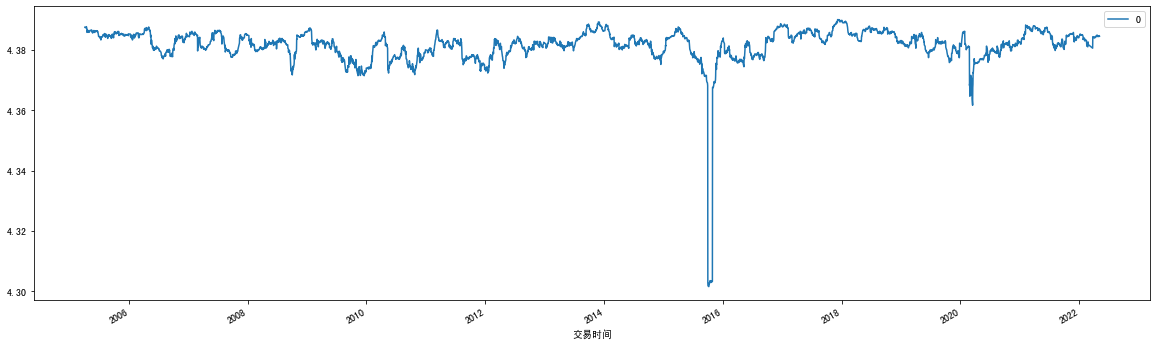

In [80]:
entropy_ts.plot(figsize=(20,6))

<AxesSubplot:xlabel='交易时间'>

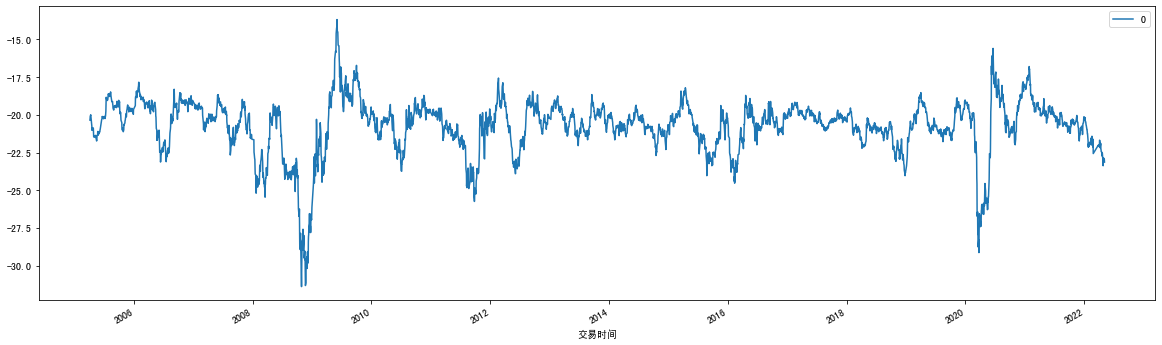

In [82]:
corr_rolling_ts.plot(figsize=(20,6))